# Xueqing Jin Assignment4b

In [1]:
import requests
import os
from dotenv import load_dotenv
import pandas as pd

In [2]:
# get a previously issued Alpha Vantage key from an .env file
env_file = 'C:/Users/DELL/Desktop/env_vars_dgroner_ws.env'
load_dotenv(env_file)
myAPIkey = os.getenv('ALPHAVANTAGE_KEY')
print(myAPIkey)

SWRYBO0Z0WG46SLS


In [3]:
# function to create an AlphaVantage request dictionary
def formIntradayRequestData(symbol, interval, apikey):
    requestData = {
        "function": "TIME_SERIES_INTRADAY",
        "symbol": symbol,
        "interval": interval,
        "datatype": "json",
        "apikey": apikey
    }
    return requestData

In [4]:
# for the tickers of interest, issue requests to the web service
symbols = ['AAPL','MSFT']
API_URL = "https://www.alphavantage.co/query"

In [41]:
#Consolidate the high data of AAPL into a pandas DataFrame
symbol = "AAPL"
requestData = formIntradayRequestData(symbol, "5min", myAPIkey)
response = requests.get(API_URL, requestData)
data = response.json()
dataMatrix = (data['Time Series (5min)'])
df_AAPL = pd.DataFrame(dataMatrix).T
df_AAPL.head()

,1. open,2. high,3. low,4. close,5. volume
2020-02-25 16:00:00,288.1600,288.9600,287.6200,288.1100,1117016
2020-02-25 15:55:00,288.5300,288.6700,287.7000,288.1700,1036424
2020-02-25 15:50:00,287.9800,289.5000,287.9300,288.4100,970610
2020-02-25 15:45:00,286.3800,288.0600,286.3300,287.9150,781847
2020-02-25 15:40:00,287.3300,287.4000,286.3910,286.3914,828221


In [42]:
#Consolidate the high data of MSFT into a pandas DataFrame
symbol = "MSFT"
requestData = formIntradayRequestData(symbol, "5min", myAPIkey)
response = requests.get(API_URL, requestData)
data = response.json()
dataMatrix = (data['Time Series (5min)'])
df_MSFT = pd.DataFrame(dataMatrix).T
df_MSFT.head()

,1. open,2. high,3. low,4. close,5. volume
2020-02-25 16:00:00,167.8800,168.6400,167.7400,168.0600,1962978
2020-02-25 15:55:00,168.4400,168.5800,167.8900,167.9100,1553706
2020-02-25 15:50:00,168.3500,169.3000,168.3500,168.4250,858374
2020-02-25 15:45:00,167.8500,168.7800,167.8213,168.3300,732367
2020-02-25 15:40:00,168.3500,168.4000,167.8100,167.8550,715320


In [29]:
import matplotlib.pyplot as plt

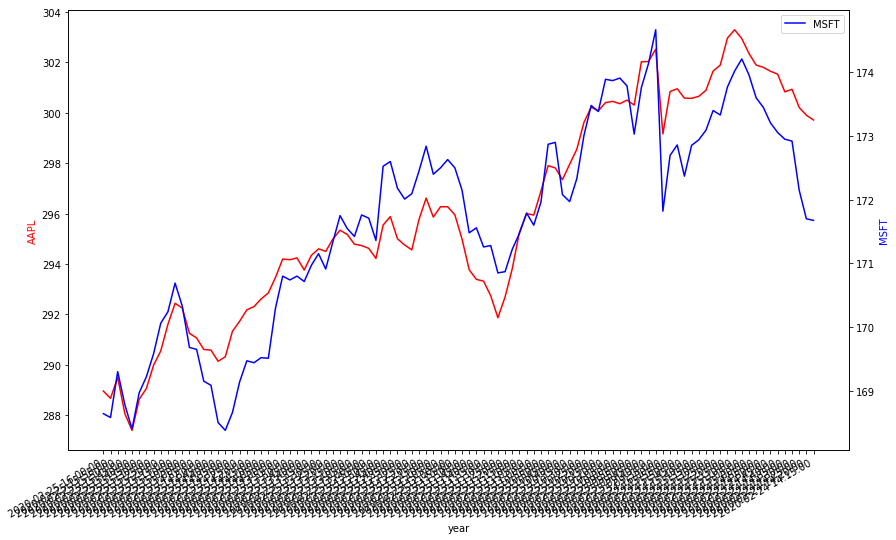

In [45]:
#Visualize the high data in one chart containing AAPL and MSFT
fig, ax1 = plt.subplots(figsize=(14,9))
ax1.plot(df_AAPL.index, df_AAPL['2. high'].astype(float), 'r-', label="AAPL")
ax1.set_xlabel('year')
ax1.set_ylabel('AAPL', color = 'red')

ax2 = ax1.twinx() 
ax2.plot(df_MSFT.index, df_MSFT['2. high'].astype(float), 'b-', label="MSFT")
mp.legend(loc=1)
ax2.set_ylabel('MSFT', color = 'blue')
mp.gcf().autofmt_xdate()
plt.legend(loc='best')
plt.show()

In [52]:
#Calculate the correlation of the 5min returns of the two price series
df = pd.concat([df_AAPL['2. high'].astype(float), df_MSFT['2. high'].astype(float)], axis=1, keys=['AAPL', 'MSFT'])
df_corr = df.corr(method='pearson')
df_corr

,AAPL,MSFT
AAPL,1.000000,0.928358
MSFT,0.928358,1.000000
